Импорт библиотек и решений

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import rosenstein # файл с решением rosenstein.py

функция для вычисления горизонта прогнозирования

In [ ]:
def forecast_horizon(lapunov, E_max, s):
    '''
    Input:
        lapunov - float parameter
        E_max - float parameter
        s - float parameter (<= 1)
    Output:
        T - float
    Description:
        Calculates estimation of forecast horizon
    '''
    T = (1/lapunov)*np.log(E_max/s)
    return T

читаем ряд лоренца

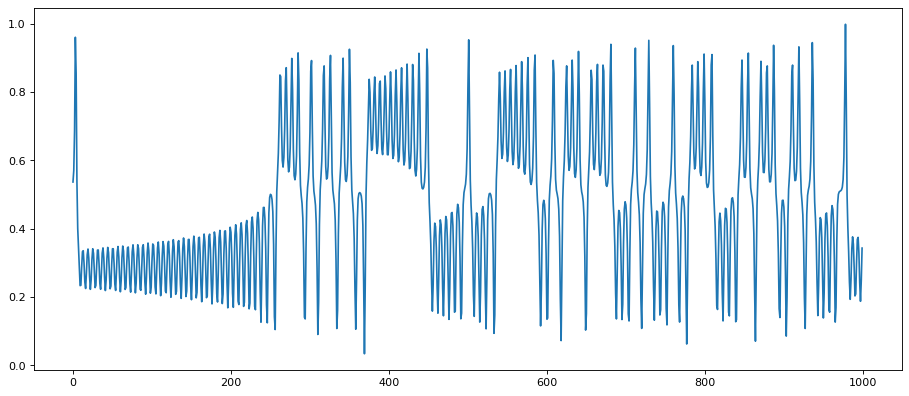

In [3]:
full_lorenz = np.loadtxt("lorenz.txt")
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(full_lorenz[:1000])
lorenz = full_lorenz[:10000]

читаем ряд количества солнечных пятен по дням

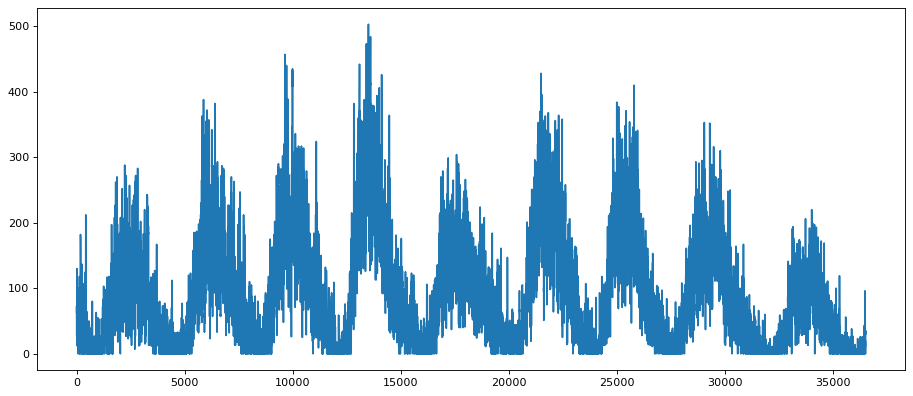

In [4]:
sunspot_df = pd.read_csv("sunspot.csv", sep=";", 
                         names=["year", "month", "day", "decimal_year", "sunspots", "deviation", "observations", "ind"])
full_sunspot = sunspot_df["sunspots"].values
sunspot = full_sunspot[-36798:-273] #01.01.1921 - 01.01.2021; 100 years; 36525 days
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(sunspot)

sunspot = sunspot[:10000]

Ряд лоренца: рассчет значений показателя ляпунова и горизонта прогнозирования при разных размерах z-векторов

In [16]:
Ms = [] #sizes of z-vectors
lorenz_lapunovs = []
lorenz_forecast_horizons = []
lorenz_times = []
for i in range(1, 8):
    t_start = time.time()
    m = 2**i
    print("M =", m)
    lorenz_lapunov = rosenstein.rosenstein_method(lorenz, m)
    t_finish = time.time()
    Ms.append(m)
    lorenz_lapunovs.append(lorenz_lapunov)
    lorenz_forecast_horizons.append(forecast_horizon(lorenz_lapunov, E_max=0.1, s = 0.01))
    lorenz_times.append((t_finish - t_start))
    print((t_finish - t_start)  // 0.06 / 1000, "minutes")
    print()

with open('lorenz_results.npy', 'wb') as f:
    np.save(f, Ms)
    np.save(f, lorenz_lapunovs)
    np.save(f, lorenz_forecast_horizons)
    np.save(f, lorenz_times)

M = 2
finding neighbours
99.0%
making lapunov estimation
99.0%
8.025 minutes

M = 4
finding neighbours
99.0%
making lapunov estimation
99.0%
8.003 minutes

M = 8
finding neighbours
99.0%
making lapunov estimation
99.0%
8.234 minutes

M = 16
finding neighbours
99.0%
making lapunov estimation
99.0%
7.825 minutes

M = 32
finding neighbours
99.0%
making lapunov estimation
99.0%
8.284 minutes

M = 64
finding neighbours
99.0%
making lapunov estimation
99.0%
7.83 minutes

M = 128
finding neighbours
99.0%
making lapunov estimation
99.0%
8.831 minutes



Ряд солнечных пятен: рассчет значений показателя ляпунова и горизонта прогнозирования при разных размерах z-векторов.
При z векторах размера < 64 встречаются идентичные, соответственно норма разности с некоторыми ближайшими соседями = 0, следовательно при оцениваниии показателя ляпунова возникает деление на 0, показатель ляпунова стремится к бесконечности, а горизонт прогнозирования стремится к нулю. 

In [6]:
sunspot_Ms = [] #sizes of z-vectors
sunspot_lapunovs = []
sunspot_forecast_horizons = []
sunspot_times = []
for i in range(1, 8):
    t_start = time.time()
    m = 64 * (2**i)
    print("M =", m)
    sunspot_lapunov = rosenstein.rosenstein_method(sunspot, m)
    t_finish = time.time()
    sunspot_Ms.append(m)
    sunspot_lapunovs.append(sunspot_lapunov)
    sunspot_forecast_horizons.append(forecast_horizon(sunspot_lapunov, E_max=20, s = 1))
    sunspot_times.append((t_finish - t_start))
    print((t_finish - t_start)  // 0.06 / 1000, "minutes")
    print()
    
#эксмеримент для z векторов размера ~ размеру выборки
t_start = time.time()
m = 9500
print("M =", m)
sunspot_lapunov = rosenstein.rosenstein_method(sunspot, m)
t_finish = time.time()
sunspot_Ms.append(m)
sunspot_lapunovs.append(sunspot_lapunov)
sunspot_forecast_horizons.append(forecast_horizon(sunspot_lapunov, E_max=20, s = 1))
sunspot_times.append((t_finish - t_start))
print((t_finish - t_start)  // 0.06 / 1000, "minutes")
print()

t_start = time.time()
m = 9750
print("M =", m)
sunspot_lapunov = rosenstein.rosenstein_method(sunspot, m)
t_finish = time.time()
sunspot_Ms.append(m)
sunspot_lapunovs.append(sunspot_lapunov)
sunspot_forecast_horizons.append(forecast_horizon(sunspot_lapunov, E_max=20, s = 1))
sunspot_times.append((t_finish - t_start))
print((t_finish - t_start)  // 0.06 / 1000, "minutes")
print()

t_start = time.time()
m = 10000
print("M =", m)
sunspot_lapunov = rosenstein.rosenstein_method(sunspot, m)
t_finish = time.time()
sunspot_Ms.append(m)
sunspot_lapunovs.append(sunspot_lapunov)
sunspot_forecast_horizons.append(forecast_horizon(sunspot_lapunov, E_max=20, s = 1))
sunspot_times.append((t_finish - t_start))
print((t_finish - t_start)  // 0.06 / 1000, "minutes")
print()

with open('sunspot_results.npy', 'wb') as f:
    np.save(f, sunspot_Ms)
    np.save(f, sunspot_lapunovs)
    np.save(f, sunspot_forecast_horizons)
    np.save(f, sunspot_times)

M = 128
finding neighbours
99.0%
making lapunov estimation
99.0%
9.435 minutes

M = 256
finding neighbours
99.0%
making lapunov estimation
99.0%
9.517 minutes

M = 512
finding neighbours
99.0%
making lapunov estimation
99.0%
9.762 minutes

M = 1024
finding neighbours
99.0%
making lapunov estimation
99.0%
9.924 minutes

M = 2048
finding neighbours
99.0%
making lapunov estimation
99.0%
9.359 minutes

M = 4096
finding neighbours
99.0%
making lapunov estimation
99.0%
7.074 minutes

M = 8192
finding neighbours
99.0%
making lapunov estimation
99.0%
0.961 minutes

M = 9500
finding neighbours
99.0%
making lapunov estimation
99.0%
0.083 minutes

M = 9750
finding neighbours
99.0%
making lapunov estimation
99.0%
0.022 minutes

M = 10000
finding neighbours


IndexError: index 1 is out of bounds for axis 0 with size 1

In [18]:
t_start = time.time()
m = 9998
print("M =", m)
sunspot_lapunov = rosenstein.rosenstein_method(sunspot, m)
t_finish = time.time()
sunspot_Ms.append(m)
sunspot_lapunovs.append(sunspot_lapunov)
sunspot_forecast_horizons.append(forecast_horizon(sunspot_lapunov, E_max=20, s = 1))
sunspot_times.append((t_finish - t_start))
print((t_finish - t_start)  // 0.06 / 1000, "minutes")
print()

M = 9998
finding neighbours
99.0%
making lapunov estimation
99.0%
0.0 minutes



In [21]:
with open('sunspot_results.npy', 'wb') as f:
    np.save(f, sunspot_Ms)
    np.save(f, sunspot_lapunovs)
    np.save(f, sunspot_forecast_horizons)
    np.save(f, sunspot_times)

Загрузка последних вычисленных результатов

In [28]:
with open('lorenz_results.npy', 'rb') as f:
    Ms = np.load(f)
    lorenz_lapunovs = np.load(f)
    lorenz_forecast_horizons = np.load(f)
    lorenz_times = np.load(f)
with open('sunspot_results.npy', 'rb') as f:
    Ms = np.load(f)
    sunspot_lapunovs = np.load(f)
    sunspot_forecast_horizons = np.load(f)
    sunspot_times = np.load(f)

Графики экспериментов для ряда Лоренца. 

Зависимость показателя Ляпунова и горизонта прогнозирования от размера z-векторов.


Зависимость горизонта прогнозирования от параметров E_max (Максимально допустимая ошибка при прогнозировании) и S (Отклонение истинных значений от наблюдаемых в начальный момент времени)


Стоило провести дополнительные эксперименты с большими размерами z-векторов, но я не успеваю.

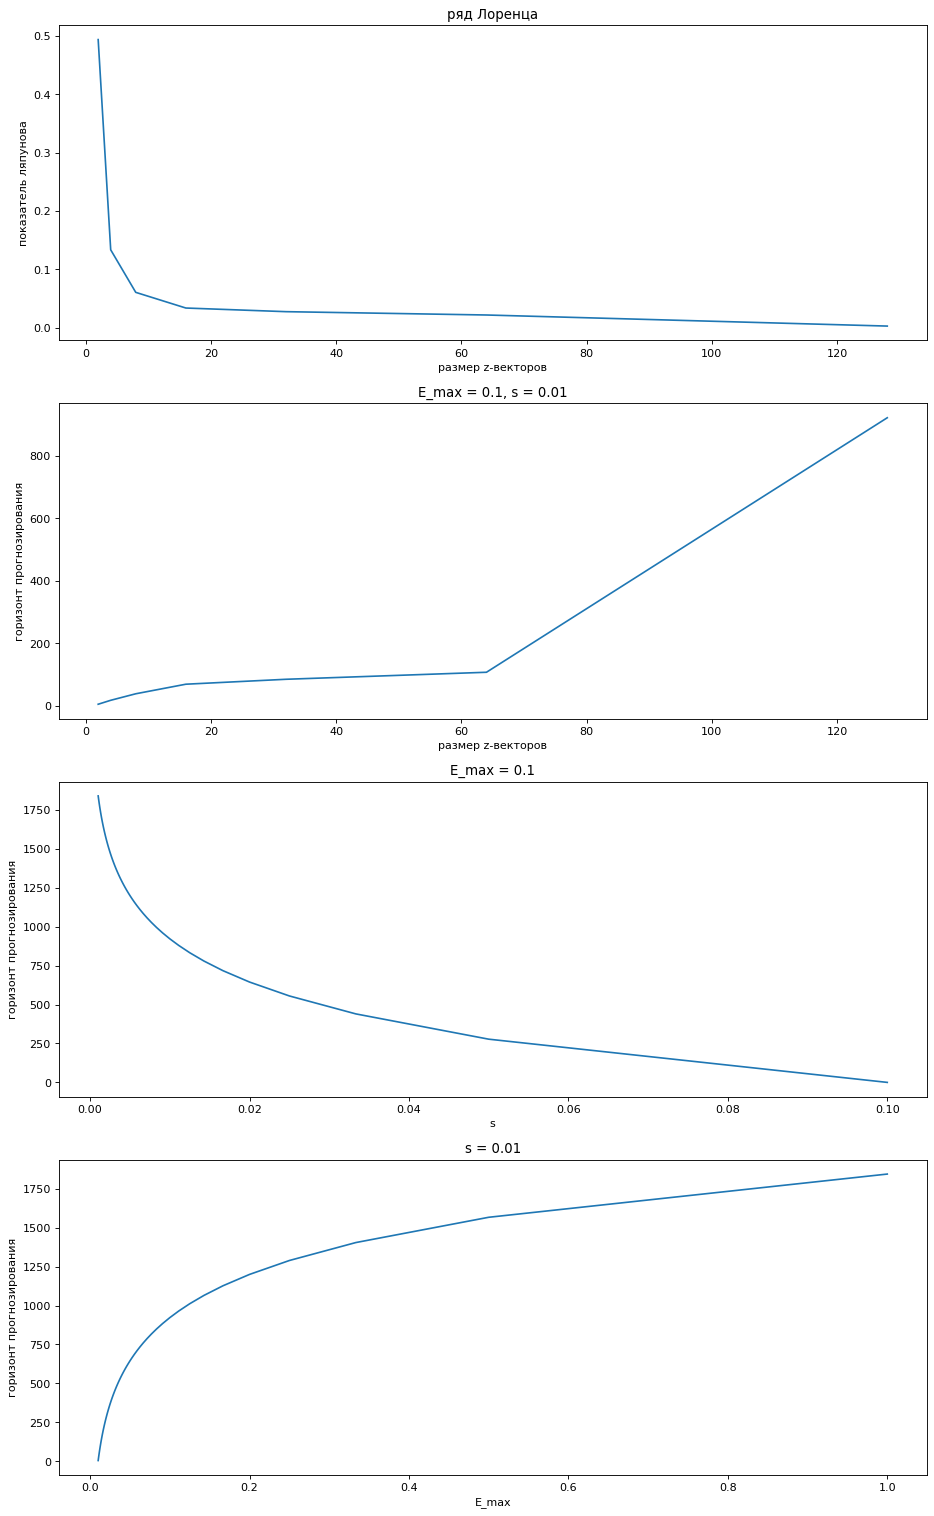

In [69]:
fig = plt.figure(figsize=(14, 24), dpi=80)
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(Ms, lorenz_lapunovs)
ax1.set_title('ряд Лоренца')
ax1.set_ylabel('показатель ляпунова')
ax1.set_xlabel('размер z-векторов')


ax2 = fig.add_subplot(4, 1, 2)
ax2.plot(Ms, lorenz_forecast_horizons)
ax2.set_title('E_max = 0.1, s = 0.01')
ax2.set_ylabel('горизонт прогнозирования')
ax2.set_xlabel('размер z-векторов')

E_max = 0.1
ss = []
horizons = []
for i in range(1, 100):
    s = E_max / i
    ss.append(s)
    horizons.append(forecast_horizon(lorenz_lapunovs[-1], E_max=E_max, s = s))

ax3 = fig.add_subplot(4, 1, 3)
ax3.plot(ss, horizons)
ax3.set_title('E_max = 0.1')
ax3.set_ylabel('горизонт прогнозирования')
ax3.set_xlabel('s')

s = 0.01
E_maxes = []
horizons = []
for i in range(1, 100):
    E_max = 1 / i
    E_maxes.append(E_max)
    horizons.append(forecast_horizon(lorenz_lapunovs[-1], E_max=E_max, s = s))

ax4 = fig.add_subplot(4, 1, 4)
ax4.plot(E_maxes, horizons)
ax4.set_title('s = 0.01')
ax4.set_ylabel('горизонт прогнозирования')
ax4.set_xlabel('E_max')
plt.show()

Графики экспериментов для ряда солнечных пятен.

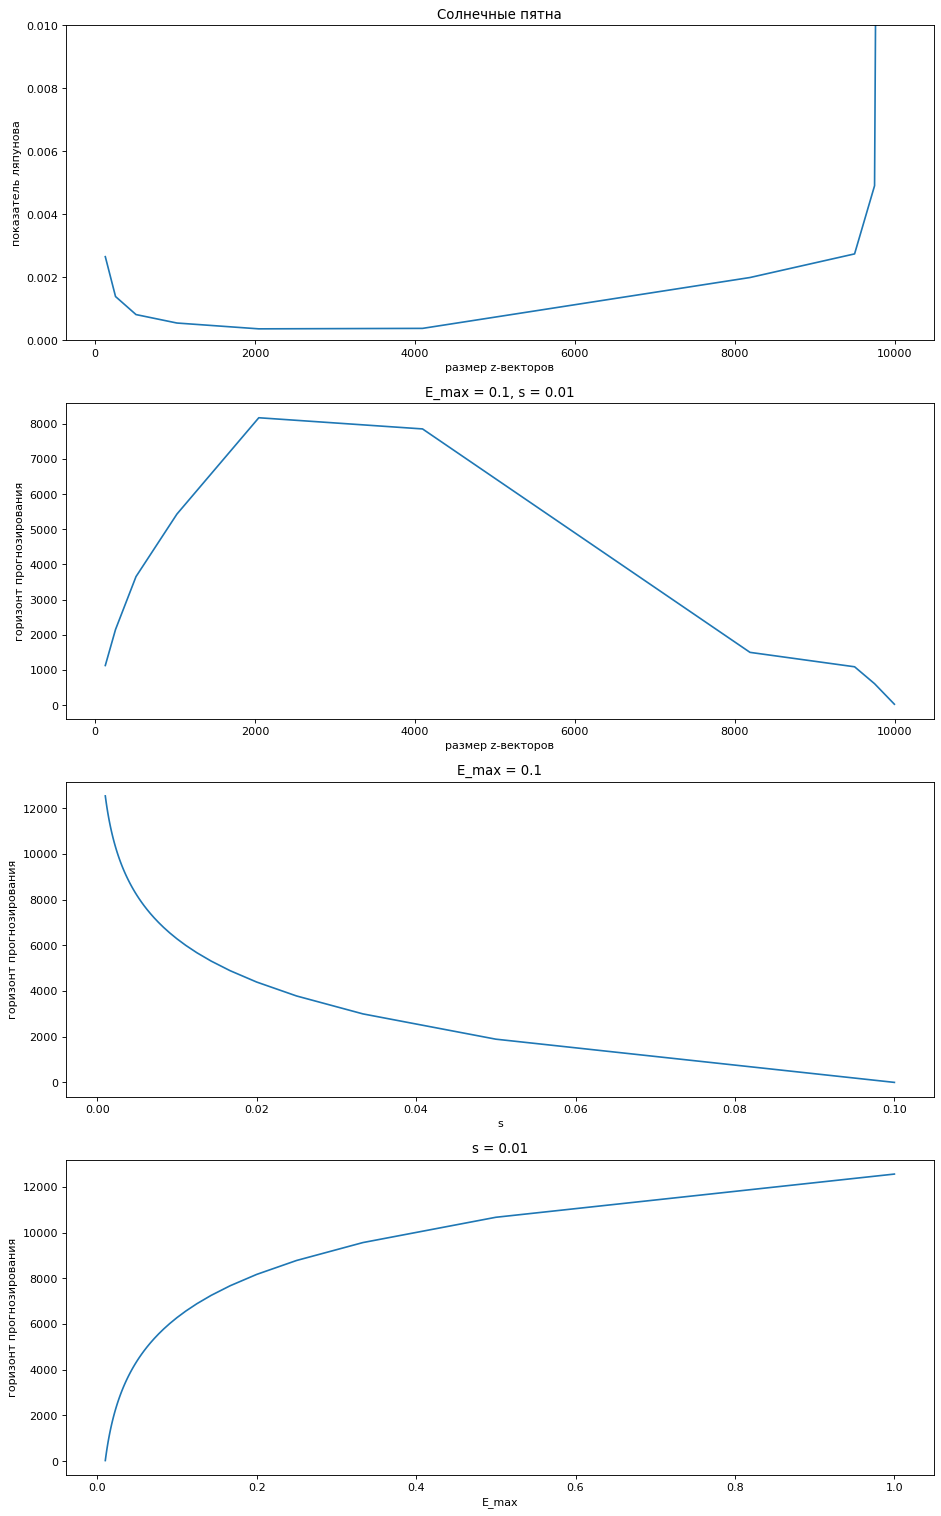

In [26]:
fig = plt.figure(figsize=(14, 24), dpi=80)
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(sunspot_Ms, sunspot_lapunovs)
ax1.set_ylim((0, 0.01))
ax1.set_title('Солнечные пятна')
ax1.set_ylabel('показатель ляпунова')
ax1.set_xlabel('размер z-векторов')


ax2 = fig.add_subplot(4, 1, 2)
ax2.plot(sunspot_Ms, sunspot_forecast_horizons)
ax2.set_title('E_max = 0.1, s = 0.01')
ax2.set_ylabel('горизонт прогнозирования')
ax2.set_xlabel('размер z-векторов')

E_max = 0.1
ss = []
horizons = []
for i in range(1, 100):
    s = E_max / i
    ss.append(s)
    horizons.append(forecast_horizon(sunspot_lapunovs[4], E_max=E_max, s = s))

ax3 = fig.add_subplot(4, 1, 3)
ax3.plot(ss, horizons)
ax3.set_title('E_max = 0.1')
ax3.set_ylabel('горизонт прогнозирования')
ax3.set_xlabel('s')

s = 0.01
E_maxes = []
horizons = []
for i in range(1, 100):
    E_max = 1 / i
    E_maxes.append(E_max)
    horizons.append(forecast_horizon(sunspot_lapunovs[4], E_max=E_max, s = s))

ax4 = fig.add_subplot(4, 1, 4)
ax4.plot(E_maxes, horizons)
ax4.set_title('s = 0.01')
ax4.set_ylabel('горизонт прогнозирования')
ax4.set_xlabel('E_max')
plt.show()

Плоскость энтропия/сложность

In [80]:
import bounds

def make_z_vectors(time_series, m):
    '''
    Input:
        x - 1d array of size n
    Output:
        z-vectors - 2d array of size n x (n-m+1)
    Description:
        Calculates z-vectors
    '''
    z_vectors = []
    for i in range(len(time_series)-m+1):
        z_vectors.append(time_series[i:i+m])
    return np.asarray(z_vectors)

def make_ordinal_vectors(z_vectors):
    ordinal_vectors = dict()
    for z_vector in z_vectors:
        ordinal_vector = ""
        for i in range(len(z_vector) - 1):
            if z_vector[i] <= z_vector[i+1]:
                ordinal_vector += "1"
            else:
                ordinal_vector += "0"
        if ordinal_vector in ordinal_vectors.keys():
            ordinal_vectors[ordinal_vector] += 1
        else:
            ordinal_vectors[ordinal_vector] = 1
    print("N =", len(ordinal_vectors.keys()))
    return ordinal_vectors

def make_Ps(ordinal_vectors, n, m):
    Ps = []
    for ordinal_vector in ordinal_vectors.keys():
        P = ordinal_vectors[ordinal_vector]/(n-m+1)
        Ps.append(P)
    return Ps


def Entropy(Ps):
    H = 0
    N = len(Ps)
    for i in range(N):
        P = Ps[i]
        H -= P * np.log(P)
    H /= np.log(N)
    return H

def make_D(Ps, H_P):
    N = len(Ps)
    Pe = [1/N]*N
    H_Pe = Entropy(Pe)
    print("H_P = ", H_P)
    print("H_Pe =", H_Pe)
    D = (H_P / 2) - (H_Pe / 2)
    return(D)
    
def Complexity(Q_0, H, Ps):
    D = make_D(Ps, H)
    print("D =", D)
    C = Q_0 * H * D
    return C
    
def solution(time_series, z_vector_size, Q_0):
    print("making z-vectors")
    z_vectors = make_z_vectors(time_series, z_vector_size)
    print("making ordinal vectors")
    ordinal_vectors = make_ordinal_vectors(z_vectors)
    print("calc Probabilities")
    Ps = make_Ps(ordinal_vectors, len(time_series), z_vector_size)
    print("calc Entropy")
    H = Entropy(Ps)
    print("calc Complexity")
    C = Complexity(Q_0, H, Ps)
    print("C =", C)
    b = bounds.bounds(len(Ps), Q_0 * np.log(len(Ps)))
    return H, C, b

кажется где-то ошибся, сложность получается отрицательной, а энтропия всегда стремится к 1, не похоже на правду

making z-vectors
making ordinal vectors
N = 9873
calc Probabilities
calc Entropy
calc Complexity
H_P =  1.0000000000000369
H_Pe = 1.0000000000000369
D = 0.0
C = 0.0


Text(0.5, 0, 'H')

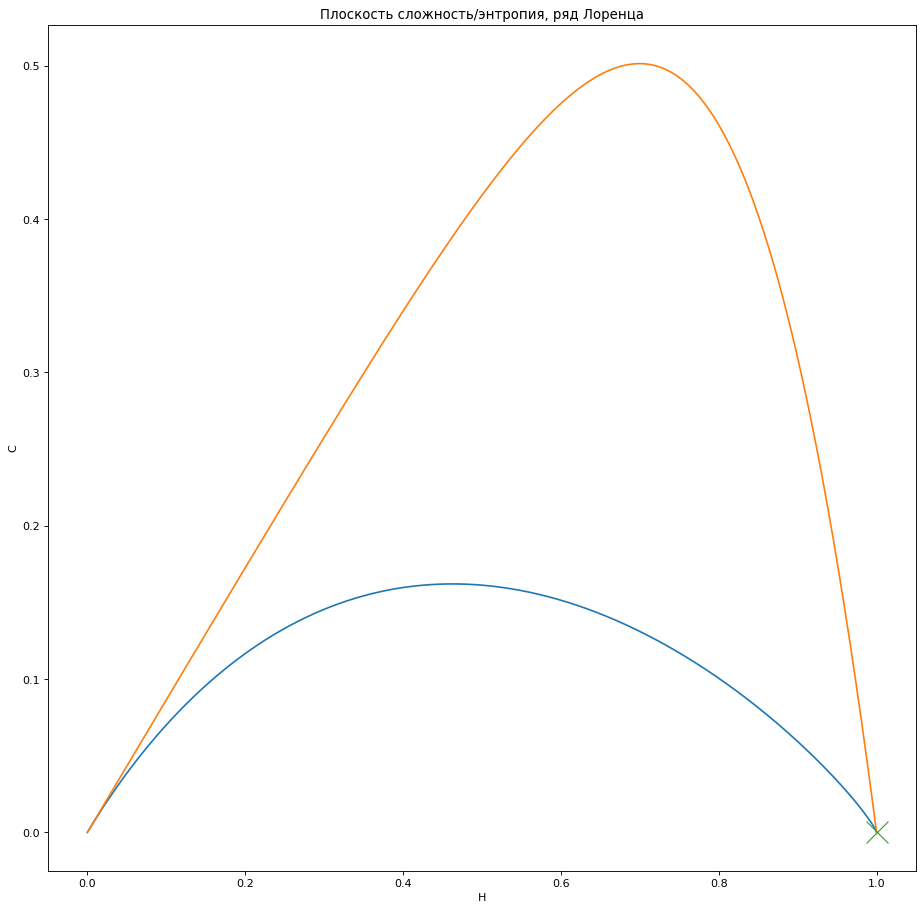

In [100]:
H, C, b = solution(lorenz, 128, 1.25)
fig = plt.figure(figsize=(14, 14), dpi=80)
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(b[0][0], b[0][1])
ax1.plot(b[1][0], b[1][1])
ax1.plot(H, C, marker = 'x', markersize=20)
ax1.set_title('Плоскость сложность/энтропия, ряд Лоренца')
ax1.set_ylabel('C')
ax1.set_xlabel('H')

making z-vectors
making ordinal vectors
N = 9875
calc Probabilities
calc Entropy
calc Complexity
H_P =  0.9988310309496186
H_Pe = 0.999999999999911
D = -0.0005844845251462005
C = -0.0007297516010323471


Text(0.5, 0, 'H')

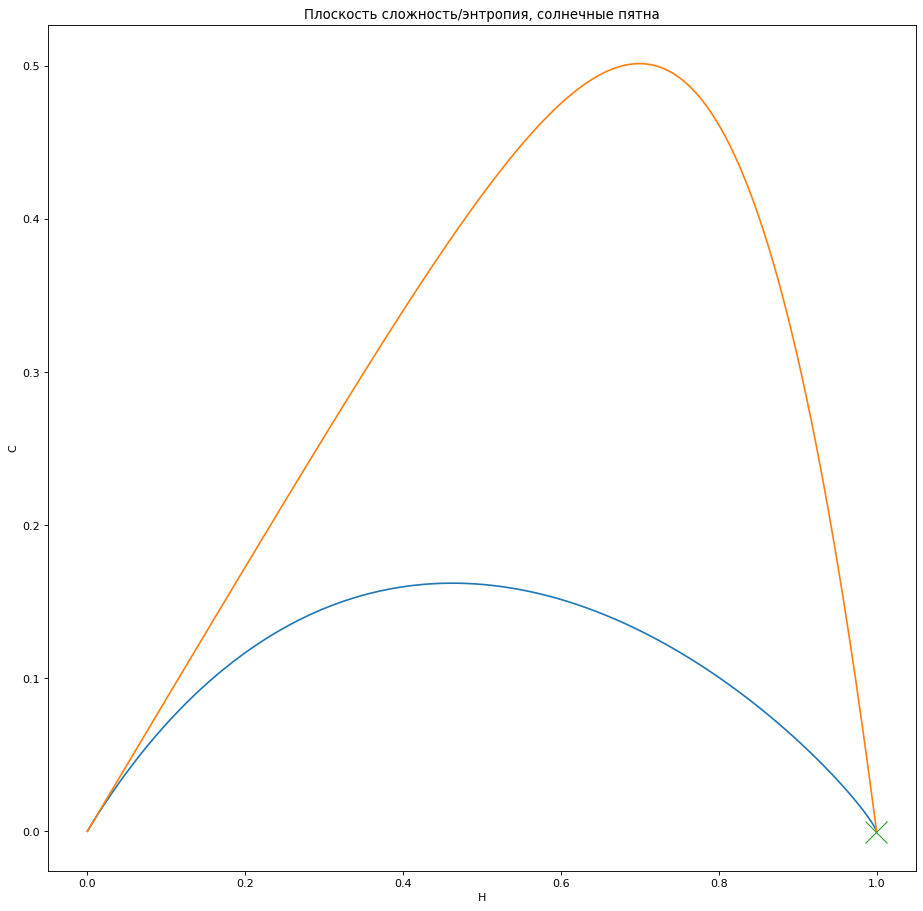

In [97]:
H, C, b = solution(sunspot, 32, 1.25)
fig = plt.figure(figsize=(14, 14), dpi=80)
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(b[0][0], b[0][1])
ax1.plot(b[1][0], b[1][1])
ax1.plot(H, C, marker = 'x', markersize=20)
ax1.set_title('Плоскость сложность/энтропия, солнечные пятна')
ax1.set_ylabel('C')
ax1.set_xlabel('H')